In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
size = (5,5)

In [8]:
n_particles = 1

In [9]:
y_coordinates = size[0] * np.random.rand(n_particles)

In [10]:
x_coordinates = size[1] * np.random.rand(n_particles)

In [11]:
x_coordinates

array([1.39184693])

In [12]:
y_coordinates

array([2.71702471])

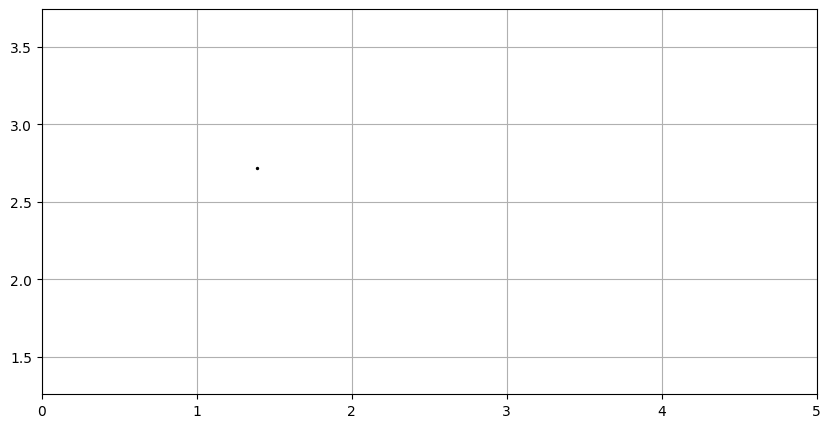

In [13]:
fig = plt.figure(figsize=(10,5))
plt.scatter(x_coordinates, y_coordinates, c='k', s=2)
plt.axis('equal')
plt.xlim([0,size[1]])
plt.ylim([0,size[0]])
# plt.yticks([0,1,2,3])
plt.grid(alpha=1)

In [14]:
np.floor(x_coordinates).astype(int)

array([1])

In [15]:
np.floor(y_coordinates).astype(int)

array([2])

In [16]:
empty_image = np.zeros(size)

for x, y in zip(np.floor(x_coordinates).astype(int), np.floor(y_coordinates).astype(int)):

    empty_image[y , x] += 1

In [17]:
empty_image

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

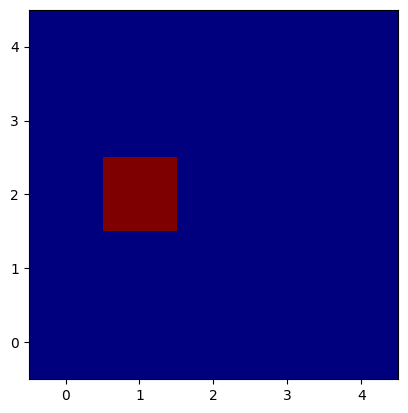

In [18]:
# fig = plt.figure(figsize=(10,5))
plt.imshow(empty_image, cmap='jet', origin='lower')
# plt.colorbar()

In [1]:
from pykitPIV import Image

In [2]:
image = Image(random_seed=100)

In [3]:
particle_height_coordinate = 2.9
particle_width_coordinate = 2.8
image_size = (6,5)
diameter=1

In [4]:
particles_with_gaussian_light = np.zeros(image_size)

px_c_height = np.floor(particle_height_coordinate).astype(int)
px_c_width = np.floor(particle_width_coordinate).astype(int)
ceil_of_particle_radius = np.ceil(diameter/2).astype(int)

for h in range(px_c_height-ceil_of_particle_radius, px_c_height+ceil_of_particle_radius+1):
    for w in range(px_c_width-ceil_of_particle_radius, px_c_width+ceil_of_particle_radius+1):

        # Only change the value of pixels that are within the image area:
        if (h >= 0 and h < image_size[0]) and (w >= 0 and w < image_size[1]):

            coordinate_height = h + 0.5 - particle_height_coordinate
            coordinate_width = w + 0.5 - particle_width_coordinate

            print("Pixel: " + str(h) + ', '+ str(w))

            print('Height: ' + str(coordinate_height))
            print('Width: ' + str(coordinate_width))
            print('- '*20)

            particles_with_gaussian_light[h,w] = particles_with_gaussian_light[h,w] + image.compute_light_intensity_at_pixel(1,
                                                                                                                            diameter,
                                                                                                                            coordinate_height,
                                                                                                                            coordinate_width,
                                                                                                                            alpha=1)


NameError: name 'np' is not defined

In [20]:
px_c_height, px_c_width

(2, 2)

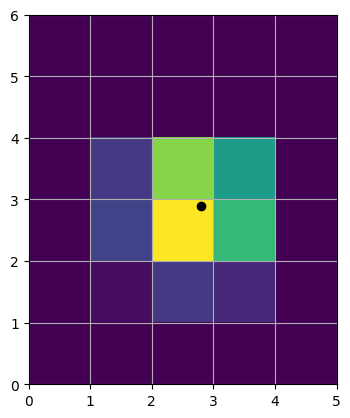

In [21]:
plt.scatter(particle_width_coordinate, particle_height_coordinate, c='k')
im = plt.imshow(particles_with_gaussian_light, origin='lower')
plt.grid()
f = lambda pixel: pixel + 0.5
im.set_extent([f(x) for x in im.get_extent()])


***